In [1]:
# /burg-archive/home/wm2377/cdwm/snakemake_versions/contour_results/sdist_include_intermediate2/N2U_5.0/shift_80/sigma2_80/contour_results_full.pickle.gz

import sys

import pickle
import numpy as np

import os
import warnings

import matplotlib as mpl
from matplotlib import pyplot as plt

from collections import defaultdict as ddict
from collections import OrderedDict as odict
from collections import namedtuple as nt
from scipy.optimize import minimize_scalar
from scipy.optimize import root
from math import erf

from scipy import stats
from scipy.integrate import quad
from scipy.optimize import broyden1 as minimize
from scipy.interpolate import interp1d
from scipy.integrate import simpson
from scipy.special import dawsn
from scipy.special import erfi
from scipy.optimize import root

from scipy import stats
from copy import deepcopy as dc
import gzip

import sys
sys.path.append('/burg-archive/home/wm2377/cdwm/snakemake_versions/')
sys.path.append('/burg-archive/home/wm2377/cdwm/snakemake_versions/scripts')
import simulations_10042023_classes_copy
from matplotlib.patches import Rectangle, FancyBboxPatch
from common_functions import *


In [2]:
concatenated_results = {}
dirname0 = '/burg-archive/home/wm2377/cdwm/snakemake_versions/contour_results/sdist_include_intermediate2'

# iterate through all results and concatenate them into a single file
for dirname1 in os.listdir(dirname0):
    subdir1 = os.path.join(dirname0,dirname1)
    if not os.path.isdir(subdir1):
        continue
    for dirname2 in os.listdir(subdir1):
        subdir2 = os.path.join(subdir1,dirname2)
        if not os.path.isdir(subdir2):
            continue
        for dirname3 in os.listdir(subdir2):
            subdir3 = os.path.join(subdir2,dirname3)
            if not os.path.isdir(subdir3):
                continue
            for file_name in os.listdir(subdir3):
                path_name = os.path.join(subdir3,file_name)
    
                with gzip.open(path_name,'rb') as fin:
                    r = pickle.load(fin)
                
                for N2U in r.keys():
                    if N2U not in concatenated_results:
                        concatenated_results[N2U] = {}
                    for shift in r[N2U].keys():
                        if shift not in concatenated_results[N2U].keys():
                            concatenated_results[N2U][shift] = {}
                        for sigma2 in r[N2U][shift].keys():
                            concatenated_results[N2U][shift][sigma2] = r[N2U][shift][sigma2]


In [3]:
# For each parameter combination and iteration
# Calculate the number of fixations and contribution to adaptation from each bin of a^2 values
processed_results = {}
for N2U in concatenated_results:
    for shift in concatenated_results[N2U]:
        for sigma2 in concatenated_results[N2U][shift]:
            
            for mode in ['fixations','adaptation']:
                for min_a2,max_a2,key in zip([10,30,100],[30,100,100000],['small_midrange','large_midrange','large']):
                    value_sum = 0
                    value_squared_sum = 0
                    n = 0
                    for replicate in concatenated_results[N2U][shift][sigma2]:
                        n += 1
                        temp_value = 0
                        fix_list = replicate[0]
                        for m in fix_list:
                            if m.a**2 > min_a2 and m.a**2 < max_a2:
                                if mode == 'fixations':
                                    temp_value += 1
                                else:
                                    temp_value += 2*m.a*(1-m.trajectory[0])/shift
                        value_sum += temp_value
                        value_squared_sum += temp_value**2
                    
                    ultimate_key = mode+'__'+key
                    if ultimate_key not in processed_results:
                        processed_results[ultimate_key] = {}
                    if shift not in processed_results[ultimate_key]:
                        processed_results[ultimate_key][shift] = {}
                    if sigma2 not in processed_results[ultimate_key][shift]:
                        processed_results[ultimate_key][shift][sigma2] = {}
                    processed_results[ultimate_key][shift][sigma2][N2U] = {'sum':value_sum,'sum_squared':value_squared_sum,'n':n}
                    


In [4]:
def calculate_summary_stats(sdist,N,shift,sigma2):
    n_seg = quad(lambda a2: sdist.pdf(a2)*n_fix_seg_given_a(a2,N,shift,sigma2,mode='fixation'),sdist.ppf(0.0001),sdist.ppf(0.9999),points=[sdist.ppf(0.1),sdist.ppf(0.9)])[0]
    n_new = quad(lambda a2: sdist.pdf(a2)*n_fix_new_given_a(a2,N,shift,sigma2,mode='fixation'),sdist.ppf(0.0001),sdist.ppf(0.9999),points=[sdist.ppf(0.1),sdist.ppf(0.9)])[0]
    adaptation_seg = quad(lambda a2: sdist.pdf(a2)*n_fix_seg_given_a(a2,N,shift,sigma2,mode='adapt'),sdist.ppf(0.0001),sdist.ppf(0.9999),points=[sdist.ppf(0.1),sdist.ppf(0.9)])[0]
    adaptation_new = quad(lambda a2: sdist.pdf(a2)*n_fix_new_given_a(a2,N,shift,sigma2,mode='adapt'),sdist.ppf(0.0001),sdist.ppf(0.9999),points=[sdist.ppf(0.1),sdist.ppf(0.9)])[0]
    return {'n_seg':n_seg,'n_new':n_new,'adaptation_seg':adaptation_seg,'adaptation_new':adaptation_new}


In [5]:
N = 5000

theoretical_results = {}
for shift in [50,80]:
    theoretical_results[shift] = {}
    for sigma2 in [40,80]:
        if shift == 50 and sigma2 == 40: continue
        theoretical_results[shift][sigma2] = {}
        for allele_type,sdist in zip(['large','small_mid','large_mid'],[stats.expon(loc=100,scale=400),stats.uniform(10,20),stats.uniform(30,70)]):
            print(shift,sigma2,allele_type)
            theoretical_results[shift][sigma2][allele_type] = calculate_summary_stats(sdist,N,shift,sigma2)
            


50 80 large


/local/ipykernel_3504707/1844408633.py:2: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  n_seg = quad(lambda a2: sdist.pdf(a2)*n_fix_seg_given_a(a2,N,shift,sigma2,mode='fixation'),sdist.ppf(0.0001),sdist.ppf(0.9999),points=[sdist.ppf(0.1),sdist.ppf(0.9)])[0]
/local/ipykernel_3504707/1844408633.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  adaptation_seg = quad(lambda a2: sdist.pdf(a2)*n_fix_seg_given_a(a2,N,shift,sigma2,mode='adapt'),sdist.ppf(0.0001),sdist.ppf(0.9999),points=[sdist.ppf(0.1),sdist.ppf(0.9)])[0]


50 80 small_mid
50 80 large_mid
80 40 large


/local/ipykernel_3504707/1844408633.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  n_new = quad(lambda a2: sdist.pdf(a2)*n_fix_new_given_a(a2,N,shift,sigma2,mode='fixation'),sdist.ppf(0.0001),sdist.ppf(0.9999),points=[sdist.ppf(0.1),sdist.ppf(0.9)])[0]
/local/ipykernel_3504707/1844408633.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, disc

80 40 small_mid


/local/ipykernel_3504707/1844408633.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  n_seg = quad(lambda a2: sdist.pdf(a2)*n_fix_seg_given_a(a2,N,shift,sigma2,mode='fixation'),sdist.ppf(0.0001),sdist.ppf(0.9999),points=[sdist.ppf(0.1),sdist.ppf(0.9)])[0]


80 40 large_mid
80 80 large


/local/ipykernel_3504707/1844408633.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  adaptation_seg = quad(lambda a2: sdist.pdf(a2)*n_fix_seg_given_a(a2,N,shift,sigma2,mode='adapt'),sdist.ppf(0.0001),sdist.ppf(0.9999),points=[sdist.ppf(0.1),sdist.ppf(0.9)])[0]


80 80 small_mid
80 80 large_mid


In [11]:
def make_panel_plot_simulated_results(ax,results,allele_type):
    
    for shift in results.keys():
        for sigma2 in results[shift].keys():
            x_values = np.sort(list(results[shift][sigma2].keys()))
            n_values = np.array([results[shift][sigma2][x]['n'] for x in x_values])
            y_values = np.array([results[shift][sigma2][x]['sum'] for x in x_values])/n_values
            v_values = np.array([results[shift][sigma2][x]['sum_squared'] for x in x_values])/n_values
            v_values = v_values - y_values**2
            e_values = np.sqrt(v_values/n_values)*2
            
            # Determine color
            if shift == 80:
                if sigma2 == 40:
                    color = 'purple'
                else:
                    color = 'cornflowerblue'
            else:
                if sigma2 == 80:
                    color = 'lightcoral'
                else:
                    continue
            
            # Adjust x values based on weighting for each allele type
            if allele_type == 'large':
                p = 0.5  
            elif allele_type == 'small_midrange':
                p = 0.5*(30-10)/(100-10)
            else:
                p = 0.5*(100-30)/(100-10)
                
            ax.errorbar(p*x_values,y_values,e_values,color=color,ls='',marker='.',markersize=3)

def make_panel_plot_theory_results(ax,theoretical_results,mode,allele_type):
    
    N2U_values = np.logspace(-3.5,0,100)
    for shift in theoretical_results.keys():
        for sigma2 in theoretical_results[shift].keys():
            rdict = theoretical_results[shift][sigma2][allele_type]
            
            # Determine color
            if shift == 80:
                if sigma2 == 40:
                    color = 'purple'
                else:
                    color = 'cornflowerblue'
            else:
                if sigma2 == 80:
                    color = 'lightcoral'
                else:
                    continue
                
            # Adjust x values based on weighting for each allele type
            if allele_type == 'large':
                p = 0.5
            elif allele_type == 'small_mid':
                p = 0.5*(30-10)/(100-10)
            else:
                p = 0.5*(100-30)/(100-10)
                
            # get number of segregating sites from other allele types that fix before these do
            # larger ones fix first, then large_midrange, then small_midrange
            n_seg_other = 0
            for k,rr in theoretical_results[shift][sigma2].items():
                if k == allele_type:
                    continue
                if allele_type == 'small_mid': 
                    n_seg_other += rr['n_seg']
                elif allele_type == 'large_mid' and k != 'small_mid':
                    n_seg_other += rr['n_seg']
                elif allele_type == 'large' and k == 'large':
                    n_seg_other += rr['n_seg']
            
            # calculate fixation probabilities
            p_fix_seg_other = (1-np.exp(-p*N2U_values*(n_seg_other)))
            p_fix_seg = (1-p_fix_seg_other)*(1-np.exp(-p*N2U_values*(rdict['n_seg'])))
            p_fix_seg_total = (1-np.exp(-p*N2U_values*(n_seg_other+rdict['n_seg'])))
            p_fix_new = (1-p_fix_seg_total)*(1-np.exp(-p*N2U_values*(rdict['n_new'])))
            p_fix = p_fix_new+p_fix_seg
            
            # plot results
            if mode == 'fixations':
                ax.plot(p*N2U_values,p_fix,color = color,ls='--',lw=2,alpha=0.5)
            else:
                if rdict['n_seg'] > 0:
                    average_fixed_effect_size_seg = rdict['adaptation_seg']/rdict['n_seg']
                else:
                    average_fixed_effect_size_seg = 0
                if rdict['n_new']>0:
                    average_fixed_effect_size_new = rdict['adaptation_new']/rdict['n_new']
                else:
                    average_fixed_effect_size_new = 0
                adapt_new = average_fixed_effect_size_new*p_fix_new
                adapt_seg = average_fixed_effect_size_seg*p_fix_seg
                adapt = (adapt_new+adapt_seg)/shift
                ax.plot(p*N2U_values,adapt,color = color,ls='--',lw=2,alpha=0.5)
            
def make_figure_S11(fig_width,fig_height):         
    letters = 'ABCDEF'
    fontsize = 10
    fig, axes_all = plt.subplots(nrows=2,ncols=3,figsize=(fig_width,fig_height),dpi=400)
    
    # plot results
    for mode,row in zip(['fixations','adaptation'],[0,1]):
        for key,col in zip(['large','large_midrange','small_midrange'],[0,1,2]):
            ax = axes_all[row][col]
            make_panel_plot_simulated_results(ax,processed_results[mode+'__'+key],allele_type=key)
            make_panel_plot_theory_results(ax,theoretical_results,mode=mode,allele_type=key.replace('range',''))
            
            # Set axis scales and labels and title
            ax.set_xscale('log')
            if mode == 'adaptation':
                ax.set_ylim([0,1])
                ax.set_yticks([0,0.5,1])
                ax.set_yticklabels([r'$0$',r'$\frac{1}{2}$',r'$1$'],fontsize=fontsize)
                if key == 'large':
                    label_extra = '\nfor ' + r'$a^2>100$'
                if key == 'large_midrange':
                    label_extra = '\nfor ' + r'$30<a^2\leq 100$'
                elif key == 'small_midrange':
                    label_extra = '\nfor ' + r'$10<a^2\leq 30$'
                ax.set_xlabel(r'Mutational input $(2NU)$'+label_extra,fontsize=fontsize,labelpad=0)
            else:
                ax.set_ylim([0,3])
                ax.set_yticks([0,1,2,3])
                ax.set_yticklabels([r'$0$',r'$1$',r'$2$',r'$3$'],fontsize=fontsize)
            
            # Adjust x lim based on weighting for each allele type
            if key == 'large':
                p = 0.5
            elif key == 'small_midrange':
                p = 0.5*(30-10)/(100-10)
            else:
                p = 0.5*(100-30)/(100-10)
            
            ax.set_xticks([1e-4,1e-2,1,1e2])
            ax.set_xlim([1e-3*p,1e3*p])
            ax.set_xticklabels([r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$'],fontsize=fontsize)
            letter = letters[row*3+col]
            ax.set_title(fr"$\bf{{{letter}.}}$",loc='left',fontsize=fontsize,pad=0)
            ax.fill_between([1e-4,p],[0,0],[3,3],color = [0.9]*3)
    # create legend
    r00 = axes_all[1][0].errorbar([],[],[],color='purple',marker='.',markersize=3,label=r'$\Lambda=80,\sigma^2=50$')
    r10, = axes_all[1][0].plot([],[],color='k',ls='--',lw=2,label=r'Double recursion')
    r01 = axes_all[1][0].errorbar([],[],[],color='cornflowerblue',marker='.',markersize=3,label=r'$\Lambda=80,\sigma^2=80$')
    r11 = axes_all[1][0].errorbar([],[],[],color=[1,1,1,0],marker='.',markersize=3,label='')
    r02 = axes_all[1][0].errorbar([],[],[],color='lightcoral',marker='.',markersize=3,label=r'$\Lambda=50,\sigma^2=80$')
    r12 = axes_all[1][0].errorbar([],[],[],color='k',marker='.',markersize=3,label=r'Mean $\pm\ 2$SEs')
    
    handle_entries = {r00.get_label():r00,
                      r10.get_label():r10,
                      r01.get_label():r01,
                      r11.get_label():r11,
                      r02.get_label():r02,
                      r12.get_label():r12}
    axes_all[1][0].legend(handles = handle_entries.values(),labels=handle_entries.keys(),ncol=3,loc=(0.1,-0.8),edgecolor='k',handlelength=1.5)
    width = 0.5
    initial_x = 0.04
    initial_x2 = 0.093
    initial_y = 0.06
    height = 1.03/2-0.08

    
    fig.patches.extend([FancyBboxPatch((initial_x,initial_y),width,height, boxstyle='Round, pad=0,rounding_size=0.025', mutation_aspect=1,facecolor=colorA_face,edgecolor=colorA_edge,clip_on=False,transform=fig.transFigure, figure=fig,zorder=-1)])
    fig.patches.extend([FancyBboxPatch((initial_x,initial_y+height),width,height, boxstyle='Round, pad=0,rounding_size=0.025', mutation_aspect=1,facecolor=colorB_face,edgecolor=colorB_edge,clip_on=False,transform=fig.transFigure, figure=fig,zorder=-1)])
    
    fig.text(x=(initial_x+initial_x2)/2,y = (height+initial_y*2)/2,s=r"$\bf{Adaptive\ contribution}$"+"\nrelative to shift",fontsize=fontsize,ha='center',va='center',color=colorA/2,rotation=90)
    fig.text(x=(initial_x+initial_x2)/2,y = (height*3+initial_y*2)/2,s=r"$\bf{Fixations}$",fontsize=fontsize,ha='center',va='center',color=colorB/2,rotation=90)
    
    width = 0.275
    initial_x = 0.093
    initial_y = -0.03
    height = 1.03
    
    fig.patches.extend([FancyBboxPatch((initial_x,initial_y),width,height, boxstyle='Round, pad=0,rounding_size=0.025', mutation_aspect=1,facecolor=color1_face,edgecolor=color1_edge,clip_on=False,transform=fig.transFigure, figure=fig,zorder=-1)])
    fig.patches.extend([FancyBboxPatch((initial_x+width,initial_y),width,height, boxstyle='Round, pad=0,rounding_size=0.025', mutation_aspect=1,facecolor=color2_face,edgecolor=color2_edge,clip_on=False,transform=fig.transFigure, figure=fig,zorder=-1)])
    fig.patches.extend([FancyBboxPatch((initial_x+2*width,initial_y),width,height, boxstyle='Round, pad=0,rounding_size=0.025', mutation_aspect=1,facecolor=color3_face,edgecolor=color3_edge,clip_on=False,transform=fig.transFigure, figure=fig,zorder=-1)])
    
    fig.text(x=(initial_x*2+width)/2,y = height+initial_y-0.01,s=r"$\bf{Large\ effect\ alleles}$",fontsize=fontsize,ha='center',va='top',color=color1_edge)
    fig.text(x=(initial_x*2+width*3)/2,y = height+initial_y-0.01,s=r"$\bf{'Large'\ midrange}$"+"\n " + r"$\bf{effect\ alleles}$",fontsize=fontsize,ha='center',va='top',color=color2_edge)
    fig.text(x=(initial_x*2+width*5)/2,y = height+initial_y-0.01,s=r"$\bf{'Small'\ midrange}$"+"\n " + r"$\bf{effect\ alleles}$",fontsize=fontsize,ha='center',va='top',color=color3_edge)
    plt.subplots_adjust(hspace=0.3)
    
    bbox = axes_all[0][0].get_window_extent()
    # Convert the bounding box to inches using the figure's DPI
    width_inches = bbox.width / fig.dpi
    height_inches = bbox.height / fig.dpi
    return fig, fig_width, fig_height, width_inches, height_inches


NameError: name 'color1_face' is not defined

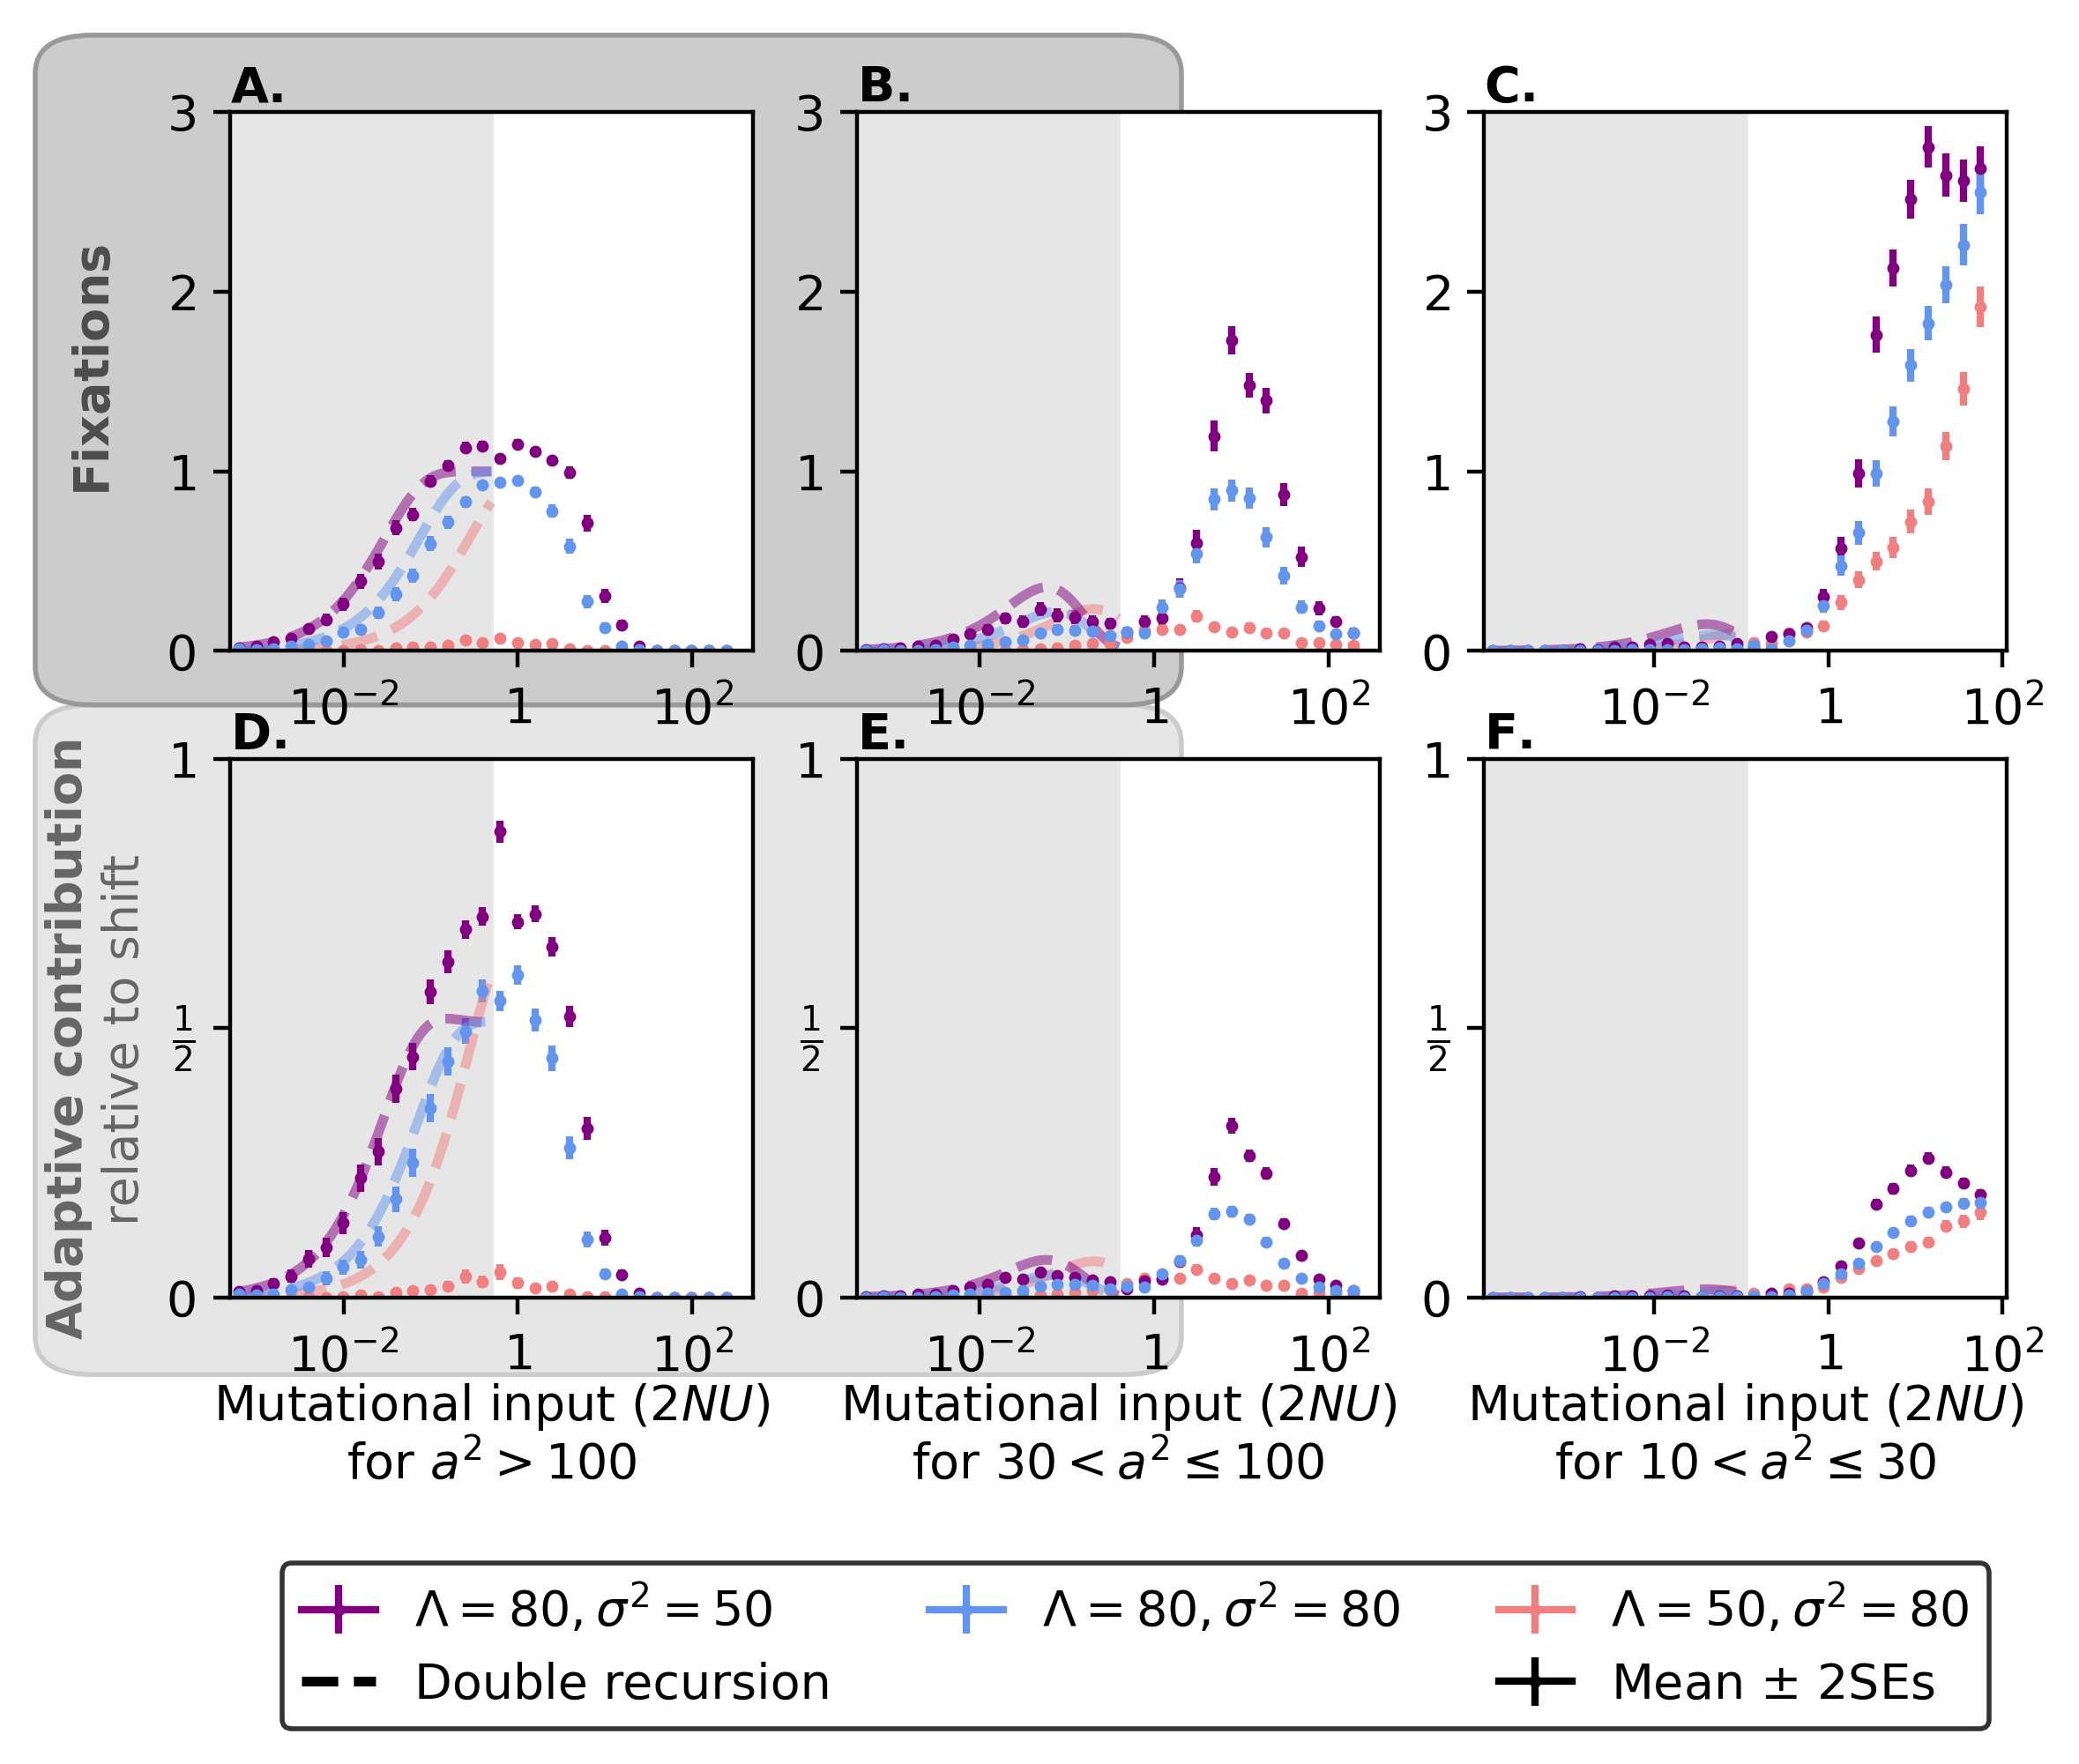

In [12]:

height = 4.366204754776362
width = 6.5
filename = './Figures/Figure_S11.png'
make_figure_set_width(fig_function=make_figure_S11,fig_width=width,fig_height=height,filename=filename,target_width_inches=6.5)
